In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks


In [110]:
pd.DataFrame(sp[0:ra]).rolling(15).mean()[0]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2180    0.0
2181    0.0
2182    0.0
2183    0.0
2184    0.0
Name: 0, Length: 2185, dtype: float64

In [194]:
peaks, _=find_peaks(pd.DataFrame(sp[0:ra]).rolling(3).mean()[0], height=5,distance=100)
np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks]

array([0.53041992, 0.93010254, 1.40822754, 1.7817627 , 2.43918457,
       3.02189941, 3.66064453, 4.03417969, 4.50109863, 4.93439941,
       5.7300293 ])

In [195]:
np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[round(0.53041992/0.003662109375)]

0.5416259765625

1.7817626953125
4.5010986328125
4.9343994140625


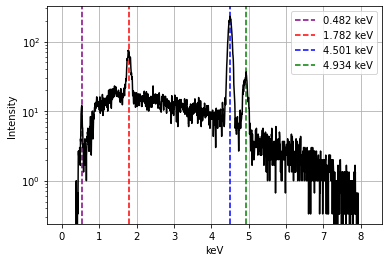

In [3]:
mca=r"107.mca"
f=open(mca,"r")
d=f.read()
f.close()

sp=[]
for a in d.split("\n",32)[32].splitlines():
    sp.append(int(a))
ra=round(8/0.003662109375)   
peaks, _=find_peaks(pd.DataFrame(sp[0:ra]).rolling(3).mean()[0], height=30,distance=100)

co=-0.6
plt.axvline(x=0.5416259765625, ls='--',color="purple", label=f"%.3f keV"% (0.5416259765625-0.06))

np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks]
for a, c in zip(np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks], ['r','b','g'], ):
    plt.axvline(x=a, ls='--',color=c, label=f"%.3f keV"% a)
    print(a)

plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],pd.DataFrame(sp[0:ra]).rolling(3).mean(),color="black")
#plt.plot(np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks],np.array(pd.DataFrame(sp[0:ra]).rolling(3).mean()[0])[peaks], "x")

plt.yscale("log")
plt.legend()
plt.grid()
plt.ylabel("Intensity")
plt.xlabel("keV")

plt.savefig("107.mca.pdf",format="pdf")

1.7817626953125
4.5010986328125
4.9343994140625


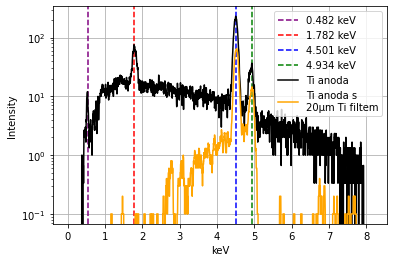

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

mca=r"107.mca"
f=open(mca,"r")
d=f.read()
f.close()

sp=[]
for a in d.split("\n",32)[32].splitlines():
    sp.append(int(a))
    
ra=round(8/0.003662109375)
peaks, _=find_peaks(pd.DataFrame(sp[0:ra]).rolling(3).mean()[0], height=30,distance=100)


co=-0.6
plt.axvline(x=0.5416259765625, ls='--',color="purple", label=f"%.3f keV"% (0.5416259765625-0.06))

np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks]
for a, c in zip(np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks], ['r','b','g'], ):
    plt.axvline(x=a, ls='--',color=c, label=f"%.3f keV"% a)
    print(a)

plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],pd.DataFrame(sp[0:ra]).rolling(3).mean(),color="black", label="Ti anoda")
#plt.plot(np.array(np.arange(0,(30-co),(30-co)/len(sp))[0:ra])[peaks],np.array(pd.DataFrame(sp[0:ra]).rolling(3).mean()[0])[peaks], "x")


mca=r"106.mca"
f=open(mca,"r")
d=f.read()
f.close()

sp=[]
for a in d.split("\n",32)[32].splitlines():
    sp.append(int(a))
    
plt.plot(np.arange(0,(30-co),(30-co)/len(sp))[0:ra],pd.DataFrame(sp[0:ra]).rolling(10).mean(),color="orange",label=f"Ti anoda s\n20μm Ti filtem")
    
plt.yscale("log")
plt.legend()
plt.grid()
plt.ylabel("Intensity")
plt.xlabel("keV")

plt.savefig("107.mca.pdf",format="pdf")

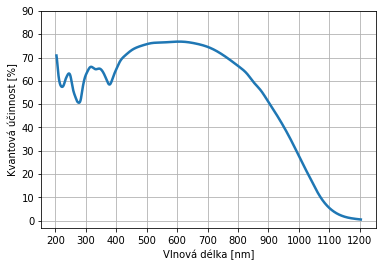

In [5]:
# Hamamatsu
from scipy.interpolate import interp1d

#čísla odečtená z datasheetu
x=np.array([2.747,2.833,2.901,2.969,3.038,3.208,3.447,3.549,3.652,3.925,4.027,4.13,4.471,4.573,4.71,4.915,5.017,5.085,5.29,5.427,5.734,6.177,6.553,7.099,7.44,7.747,8.055,8.328,8.737,9.386,9.898,10.375,11.126,11.945,12.696,13.891,14.983,16.212,17.235,18.771,19.488,20,20.648,21.263,21.945,23.481,24.266,24.881,25.836,26.928,27.543,28.43,29.437])
y=np.array([7.135,6.84,6.467,6.161,5.957,5.753,5.866,6.036,6.161,6.297,6.149,5.855,5.255,5.13,5.062,5.232,5.549,5.753,6.183,6.342,6.591,6.501,6.523,6.116,5.844,6.183,6.546,6.829,7.067,7.327,7.452,7.531,7.622,7.644,7.667,7.678,7.599,7.418,7.146,6.602,6.285,5.957,5.595,5.142,4.621,3.284,2.503,1.914,1.042,0.43,0.249,0.113,0.045])

#Kalibrace
x=x/32*1200+100
y=y/11*110

#Interpolace 
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(204, 1203, num=10000, endpoint=True)
import matplotlib.pyplot as plt

plt.plot(xnew, f2(xnew), '-', linewidth=2.5)
#plt.plot(x, y, '-', )
plt.grid()
plt.ylabel("Kvantová účinnost [%]")
plt.xlabel("Vlnová délka [nm]")
plt.xticks(np.arange(200,1250,100))
plt.yticks(np.arange(0,100,10))
plt.savefig("hamamatsu_spect.pdf",format="pdf")
plt.show()

# D700

<AxesSubplot:>

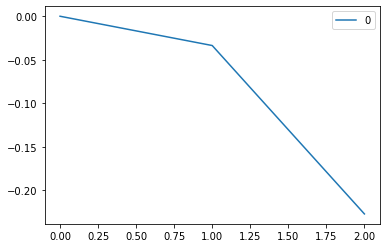

In [206]:
pd.DataFrame([0,16.39374-16.42742,16.39374-16.62108]).plot()

16.39374
16.42742
16.62108


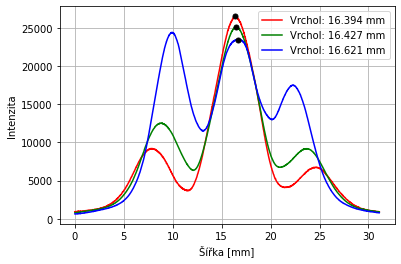

In [202]:
df=pd.read_csv("D700_1Dohnisko.csv",)[["r","g","b"]]

df["suma"]=df["r"]+df["b"]+df["g"]
position=df.index*0.00842

#for a, c, n in zip(list(df)[0:4],["r","g","b","black"], ['Červená','Zelená','Modrá',"suma"] ):   
for a, c, n in zip(list(df)[0:3],["r","g","b"], ['Červená','Modrá','Zelená'] ):
    
    peaks, val=find_peaks(df[c], height=5000,distance=500)  
    b= np.array(df.index*0.00842)[peaks[1]]
    
    plt.plot(df.index*0.00842,df[a],color=c, label=f"Vrchol: %.3f mm"% b)
    plt.plot(b,val["peak_heights"][1],'.', color="black", markersize=10 )#, label=f"%.3f keV"% a)
    print(b)
        
plt.xlabel("Šířka [mm]")
plt.ylabel("Intenzita")
plt.grid()
plt.legend()
plt.savefig("D700_lomSvetla.pdf",format="pdf")


# FWHM

In [98]:
from time import asctime
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy import special

gauss = lambda x,A,mi,sigma: A*np.exp(-(x-mi)**2/(2*sigma**2))
gerf = lambda x,A1,A2,mi,sigma: A1*np.exp(-(x-mi)**2/(2*sigma**2)) + A2*special.erf((x-mi)/(np.sqrt(2)*sigma))
gerfc = lambda x,A1,A2,mi,sigma: A1*np.exp(-(x-mi)**2/(2*sigma**2)) + A2*special.erfc((x-mi)/(np.sqrt(2)*sigma))
px_size = 0.020

- Parameters of the fit -


Text(13.000480000000001, 12416.245302618041, 'Mean: 16.511\nSigma: 2.325\nFWHM: 5.475\nHeight: 24832.491')

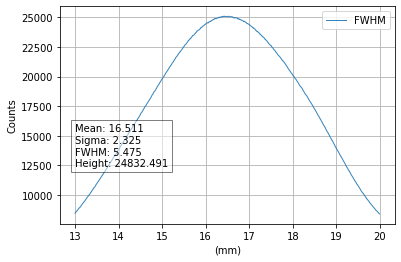

In [106]:
y = df["G"]
x=position

# calculate initial parameters
mi = sum(x*y)/sum(y) 
sigma = np.sqrt(sum(y*(x-mi)**2)/sum(y)) 

# fit data
x_fit = np.arange(min(x), max(x), 0.1)
popt,pcov = curve_fit(gauss, x, y, p0=[max(y),mi,sigma]) #gauss
fit = gauss(x_fit,*popt)

# show plot
plt.figure(4)
#    plt.plot(x, y)
plt.plot(x, y, '-', label="FWHM", linewidth=1, alpha=0.9)
plt.xlabel('(mm)')
plt.ylabel('Counts')
#plt.title(file.replace('.fits',''))
plt.legend()
plt.grid('on')

style = {'edgecolor':'black', 'facecolor':'white', 'alpha':0.5}
# display parameters of the fit
print('- Parameters of the fit -')
plt.text(min(x), 0.5*popt[0], 'Mean: {:.3f}\nSigma: {:.3f}\nFWHM: {:.3f}\nHeight: {:.3f}'.format(popt[1],popt[2],2.355*popt[2],popt[0]), bbox=style)

#   d.append({"File":file.replace('.fits',''),"Mean":popt[1],"Sigma":popt[2],"FWHM":2.355*popt[2],"Height":popt[0]})
#   plt.savefig(file.strip(".fits") +"_FWHM.png",bbox_inches='tight', format="png", dpi=300,transparent=False)

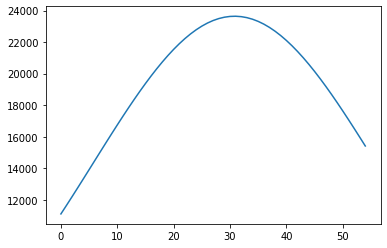

In [181]:
plt.plot(fit)

Červená  Mean: 16.443	Sigma: 2.237	FWHM: 5.267	Height: 26187.923
16.39725999999999
Zelená  Mean: 16.517	Sigma: 2.307	FWHM: 5.433	Height: 24883.048
16.49725999999999
Modrá  Mean: 16.579	Sigma: 2.506	FWHM: 5.902	Height: 23641.069
16.59725999999999


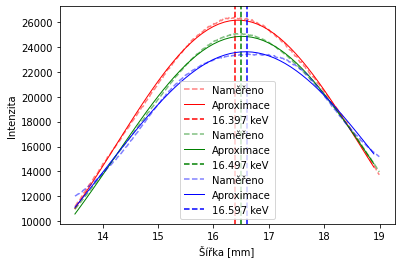

In [183]:
df=pd.read_csv("D700_1Dohnisko.csv",)[["r","g","b"]][round(13.5/0.00842):round(19/0.00842)]
position=df.index*0.00842
#for a, c, n in zip(list(df)[0:4],["r","g","b","black"], ['Červená','Zelená','Modrá',"suma"] ):   
for a, c, n in zip(list(df)[0:3],["r","g","b"], ['Červená','Zelená','Modrá'] ):

    y = df[a]
    x=position
    # calculate initial parameters
    mi = sum(x*y)/sum(y) 
    sigma = np.sqrt(sum(y*(x-mi)**2)/sum(y)) 
    # fit data
    x_fit = np.arange(min(x), max(x), 0.1)
    popt,pcov = curve_fit(gauss, x, y, p0=[max(y),mi,sigma]) #gauss
    fit = gauss(x_fit,*popt)
    
    plt.plot(df.index*0.00842,df[a],'--',color=c, label=f"Naměřeno", alpha=0.5)
    plt.plot(x_fit, fit, '-', color=c, label=f"Aproximace", linewidth=1)     
    print(n+"  "+'Mean: {:.3f}\tSigma: {:.3f}\tFWHM: {:.3f}\tHeight: {:.3f}'.format(popt[1],popt[2],2.355*popt[2],popt[0]))   
    
    peaks, _=find_peaks(fit, height=5000,distance=500)
    for a in x_fit[peaks]:
        plt.axvline(x=a, ls='--',color=c.lower(), label=f"%.3f keV"% a)
        print(a)
        
plt.xlabel("Šířka [mm]")
plt.ylabel("Intenzita")
plt.legend()

In [131]:
print(min(x), 0.5*popt[0], 'Mean: {:.3f}\nSigma: {:.3f}\nFWHM: {:.3f}\nHeight: {:.3f}'.format(popt[1],popt[2],2.355*popt[2],popt[0]))   


14.002460000000001 11855.780666349372 Mean: 16.588
Sigma: 2.468
FWHM: 5.813
Height: 23711.561
